## Elections and Religion

**In this paper we question the claim that people from certain religious demographics vote systemically to political parites in India. This question stems from the claims that political pundits in India often make, and this paper is an effort to see if there exists any correlation between religion demographics and vote percentages to political parties in the Indian General Elections.**

**Input Data**
- Indian Census Data 2011
- Indian districts and parliamentary constituencies map
- Indian General Elections Data 2019
- List of Political Parties in the General Elections
- India's Political Map

**Brief Discussion of Methodolody and Design Choices**

Starting out, we had to scrape for the census and the elections data on the Indinan Government's website and clean it for our purposes. Indian Census Data is not mapped to the Parliamentary Constituencies (PCs) which is the divison on which the General Elections are conducted. To map the demographics from the census to the PC level, we considered the population density to be homogenous. This was the first design choice, based off of a Harvard research paper which proves that considering a homogenous population density is viable.

We had India's political map divided at PC and district level. We found out the percentage of area of a district into a PC and then transformed the census to Parliamentary constituency level. On aggregation of all districts, we had an approximate census for the PC level. We had the religion demographics for the PCs and the voting data.

The voting data had over 700 unique political parties due to the presence of small local parties in a state. There were discrepancies between party names in the election results and the names submitted by the Election commission of India. We cleaned this by dropping the parties which had little (<1%) votes secured. These, along with the election's detailed results were used to get plots and corelations for religion and vote percentages to political parties in India.

**Discussion and results**

The most widespread claim in India is that there is a clear division of who votes whom. The Hindu population is claimed to vote the current ruling party Bhartiya Janta Party (BJP) systemically and the Muslims are claimed to be on the Indian National Congress's (INC) side. These are the two most discussed religion demographics and parties, so here, we'd like to focus our attention on them. Having said that, our analysis is not limited to these parties or religion demographics.

If the said sweeping claims were to be true, a rather consistent corelation should be observed in the voting results. This, however, as we've found, is far from the truth. In majority of the states in India, systemic voting is not true. The BJP shows no consistency with the hindu votes, even in few of the most divided states, like Uttar Pradesh.

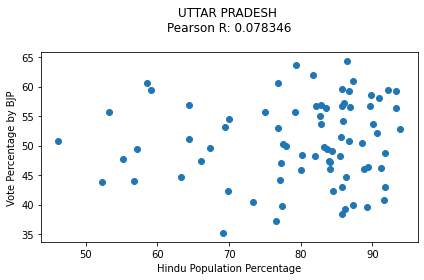

In [26]:
plot_state("BJP","hindu", "UTTAR PRADESH")

The picture is no better if we study the entire country.

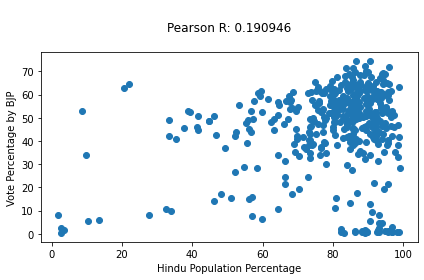

In [27]:
plot_data("BJP", "hindu")

Similar observations are made with the INC and their said favorite religion demographic.

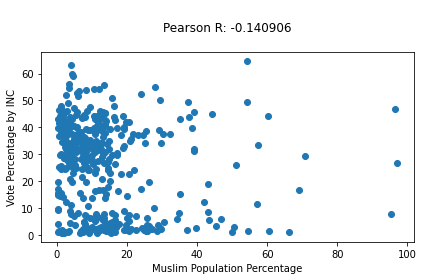

In [28]:
plot_data("INC", "muslim")

The most convincing corelation is with Kerala which is believed to be a stronghold for the INC, because of her muslim population.

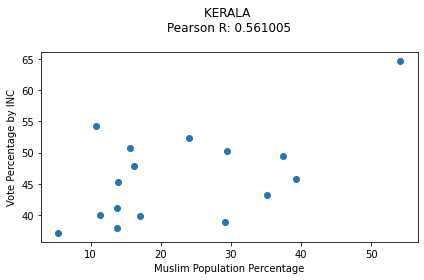

In [29]:
plot_state("INC","muslim","KERALA")

**Future Work**

This brief discussion of results demonstrates some of our findings from the project. A more robust report, with discussions about the coalition parties, zoning into the most radical states is in the works, but pursued passively. We are planning to discuss our findings with an political expert and to know more about what we can study into the data. 